##  Case study: Unsupervised Learning
----------------------------------------

Welcome to the case study on Unsupervised Learning. We will be using a company's Customer Data for this case study.

----------------------------
## Problem Statement: 
-----------------------------
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

----------------------------
## Objective: 
-----------------------------

Need to perform clustering to summarize customer segments.


--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

People:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise



Products:
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years



Promotion:
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



Place:
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Importing libraries and overview of the dataset

In [123]:
!pip install scikit-learn-extra


                                              0.0/340.5 kB ? eta -:--:--
     ---                                      30.7/340.5 kB ? eta -:--:--
     ---                                      30.7/340.5 kB ? eta -:--:--
     -----------                          112.6/340.5 kB 939.4 kB/s eta 0:00:01
     -----------                          112.6/340.5 kB 939.4 kB/s eta 0:00:01
     ---------------------------            245.8/340.5 kB 1.3 MB/s eta 0:00:01
     ---------------------------            245.8/340.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  337.9/340.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  337.9/340.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  337.9/340.5 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 340.5/340.5 kB 729.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**

- There are 2240 observations and 29 columns in the dataset.
- Just the Income column has 24 missing values
- All columns are object, int64, and float64 data type.

In [79]:
df.loc[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [80]:
# Drop rows with missing values in the 'Income' column

df.dropna(subset=['Income'], inplace=True)

In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [82]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Data Pre-Processing

In [83]:
df.Kidhome.value_counts()

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

-  Replacing entries in the Education and Marital_status columns that have similar meanings

In [84]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [85]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [86]:
# Replace certain entries in the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace({'Together': 'Married', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})
df.Marital_Status.unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [87]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

-  Creating the age columns from the Year_birth Column

In [88]:
# Convert 'Year_Birth' to datetime format
df['Year'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# Get the current year
current_year = datetime.now().year

# Calculate age by subtracting birth year from current year
df['Age'] = current_year - df['Year'].dt.year

# Display the DataFrame with the new 'Age' column
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1957-01-01,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,1954-01-01,70
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,1965-01-01,59
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,1984-01-01,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,1981-01-01,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1967-01-01,57
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,1946-01-01,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1981-01-01,43
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,1956-01-01,68


In [89]:
df.drop(columns=['Year'], inplace=True)


-  Checking for Outliers

In [90]:

def print_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = column[(column < lower_fence) | (column > upper_fence)]
    
    print(f"Outliers in {column.name}:")
    print(outliers)

print_outliers(df['Age'])
print_outliers(df['Income'])

Outliers in Age:
192    124
239    131
339    125
Name: Age, dtype: int32
Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


-  REMOVING OUTLIERS

In [91]:

def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    no_outliers = column[(column >= lower_fence) & (column <= upper_fence)]
    return no_outliers

no_outliers_age = remove_outliers(df['Age'])
no_outliers_income = remove_outliers(df['Income'])
df = df[(df['Age'].isin(no_outliers_age)) & (df['Income'].isin(no_outliers_income))]
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2192,7990,1947,Graduation,Married,27469.0,0,0,02-08-2012,2,9,...,0,0,0,0,0,0,3,11,0,77
787,6299,1968,PhD,Divorced,42564.0,0,1,02-01-2013,28,324,...,1,0,0,0,0,0,3,11,1,56
1677,6347,1979,Basic,Single,15862.0,1,0,27-06-2013,26,1,...,0,0,0,0,0,0,3,11,0,45
2178,4377,1971,Graduation,Married,52914.0,0,1,07-01-2013,32,254,...,1,0,0,0,0,0,3,11,0,53
807,7352,1957,Graduation,Married,55267.0,0,1,21-10-2013,28,161,...,0,0,0,0,0,0,3,11,0,67
592,4501,1965,Master,Single,69882.0,0,0,10-11-2013,94,292,...,0,0,0,0,0,0,3,11,0,59
1104,4444,1972,Graduation,Married,30023.0,1,0,24-03-2014,28,11,...,0,0,0,0,0,0,3,11,0,52
1682,2156,1955,PhD,Married,22554.0,1,1,03-11-2012,38,27,...,0,0,0,0,0,0,3,11,0,69
1262,6049,1982,Master,Married,73450.0,0,0,05-12-2013,85,1142,...,1,0,0,1,0,0,3,11,0,42
896,5519,1956,Graduation,Married,64090.0,0,1,07-08-2013,8,316,...,0,0,0,0,0,0,3,11,1,68


# Exploratory Data Analysis

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


#### Summary Statistics

**Observations:**

- The average Income has a high range as it has a minimum value of 1K and a maximum value of 100K.
- The mean of the Income is approx 51.6K with a large standard deviation of 20.7K.
- The average age is approx 55 (rounding off to nearest integer).
- On average, a customer hasnt purchased from the company in 49 years, 5 web visits, and made 6 store visits. 

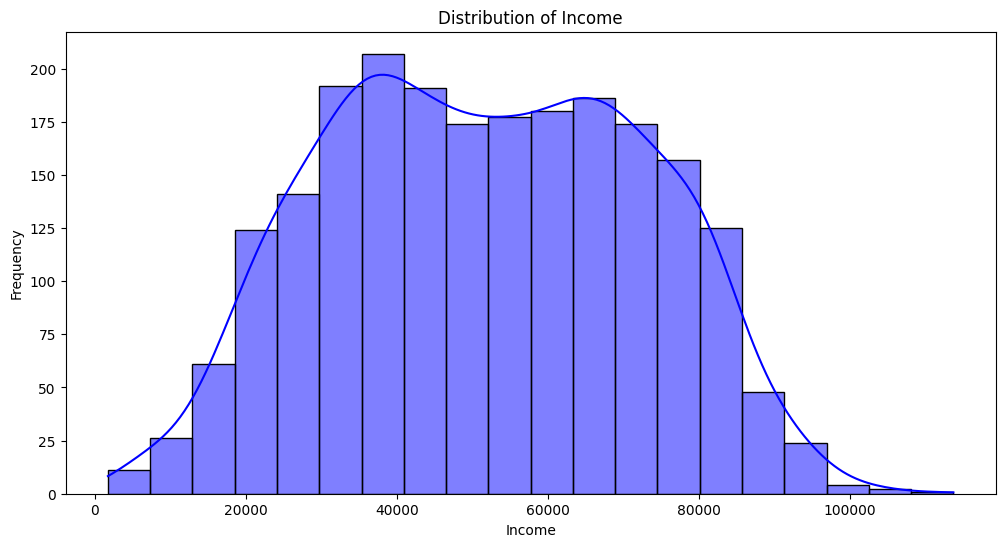

In [93]:
# Distribution of numerical variables

plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=20, kde=True, color='blue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\OMOJOLA OLUWAFEMI\AppData\Local\Temp\ipykernel_21280\4190035959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


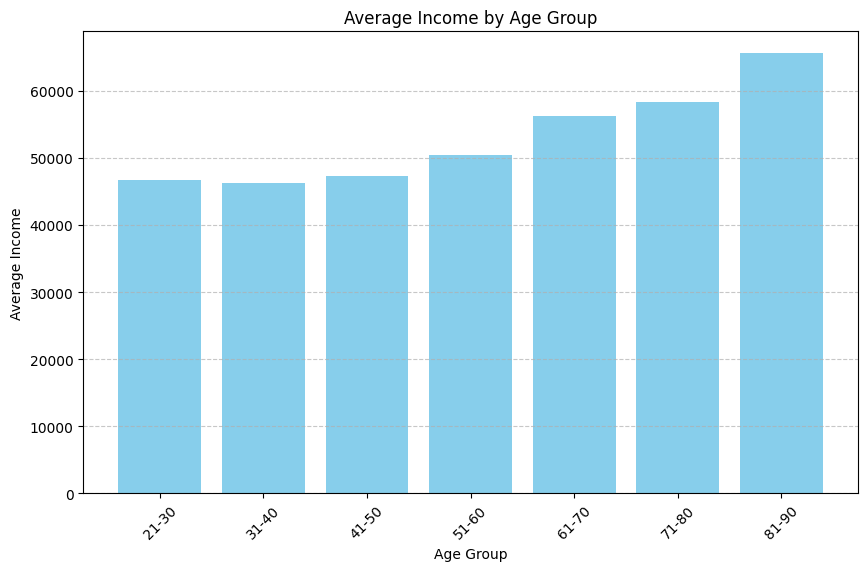

In [94]:
# Define age bins
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]  # Define age bins
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']  # Define labels for age groups

# Create 'Age_Group' column based on age bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average income for each age group
average_income_by_age_group = df.groupby('Age_Group')['Income'].mean().reset_index()

# Plot the trend in income across age groups
plt.figure(figsize=(10, 6))
plt.bar(average_income_by_age_group['Age_Group'], average_income_by_age_group['Income'], color='skyblue')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

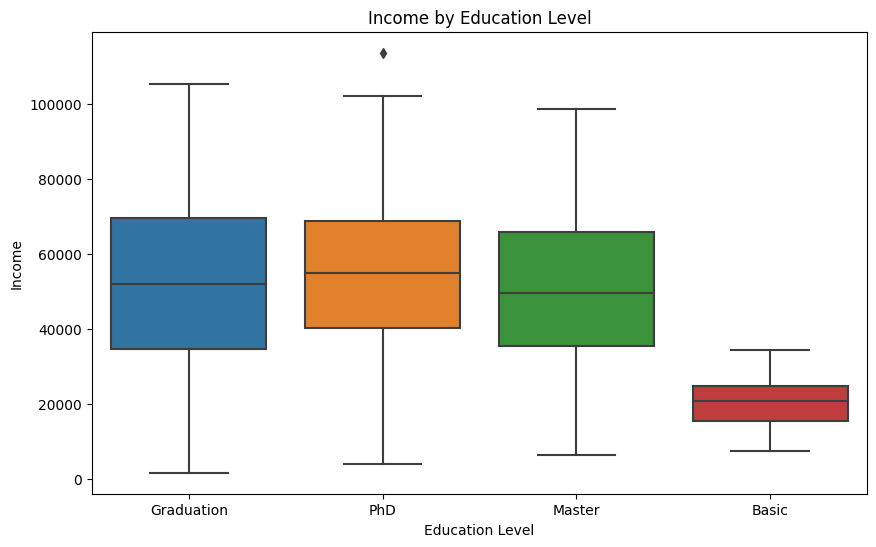

In [95]:
# Relationship between education and income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

# Step 4 – Compute Frequency, and Monetary Values

In [96]:
# Define the columns you want to sum
columns_to_sum = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Sum the values of specified columns across each row
df['Total_Spent'] = df[columns_to_sum].sum(axis=1)

# Display the updated DataFrame with the new 'Total_Spent' co
df.head()


C:\Users\OMOJOLA OLUWAFEMI\AppData\Local\Temp\ipykernel_21280\3118872585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spent'] = df[columns_to_sum].sum(axis=1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,67,61-70,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,70,71-80,27
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,59,51-60,776
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,40,41-50,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,43,41-50,422


In [97]:
# Define the columns you want to sum
columns_to_sum = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Sum the values of specified columns across each row
df['Frequency'] = df[columns_to_sum].sum(axis=1)

# Display the updated DataFrame with the new 'Total_Spent' co
df.head()


C:\Users\OMOJOLA OLUWAFEMI\AppData\Local\Temp\ipykernel_21280\2672536718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'] = df[columns_to_sum].sum(axis=1)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Spent,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,67,61-70,1617,29
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,70,71-80,27,9
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,59,51-60,776,24
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,40,41-50,53,12
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,43,41-50,422,19


In [98]:
# Save DataFrame to CSV file with tab delimiter
df.to_csv('new_data.csv', sep='\t', index=False)


In [99]:
# Define the columns you want to include in the new DataFrame
columns_to_keep = ['Recency', 'Total_Spent', 'Frequency']

# Create a new DataFrame with only the specified columns from the original DataFrame
rfm_df = df[columns_to_keep].copy()

# Display the new DataFrame
rfm_df.head()


,Recency,Total_Spent,Frequency
0,58,1617,29
1,38,27,9
2,26,776,24
3,26,53,12
4,94,422,19


In [105]:
rfm_df.describe()

,Recency,Total_Spent,Frequency
count,2205.000000,2205.000000,2205.000000
mean,49.009070,606.821769,17.906576
std,28.932111,601.675284,6.509269
min,0.000000,5.000000,5.000000
25%,24.000000,69.000000,12.000000
50%,49.000000,397.000000,17.000000
75%,74.000000,1047.000000,23.000000
max,99.000000,2525.000000,38.000000


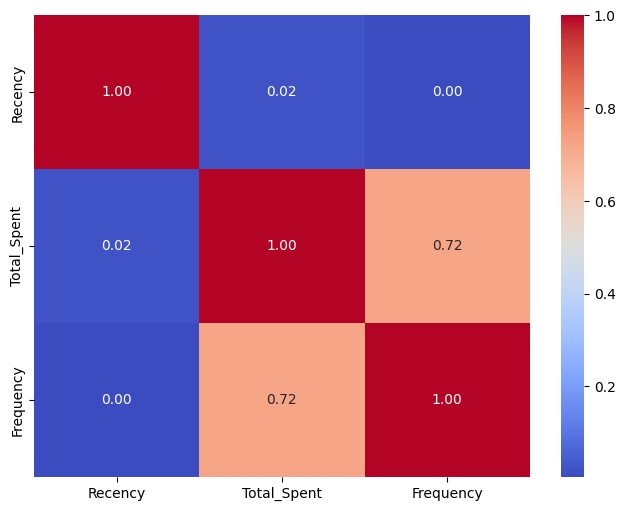

In [101]:
plt.figure(figsize=(8,6))
sns.heatmap(rfm_df.corr(), annot=True, fmt='0.2f', cmap = "coolwarm")
plt.show()

-  Define bin edges based on statistical description


In [103]:
rfm = rfm_df.copy() 

In [104]:
recency_bins = [0, 25, 50, 75, 100]
total_spent_bins = [5, 300, 600, 1047, 2000, 2525]
frequency_bins = [5, 12, 17, 23, 38]

# Calculate Recency score based on custom bins
rfm['R_Score'] = pd.cut(rfm_df['Recency'], bins=recency_bins, labels=range(1, 5), include_lowest=True).astype(int)

# Calculate Monetary score based on custom bins
rfm['M_Score'] = pd.cut(rfm_df['Total_Spent'], bins=total_spent_bins, labels=range(1, 6), include_lowest=True).astype(int)

# Calculate Frequency score based on custom bins
rfm['F_Score'] = pd.cut(rfm_df['Frequency'], bins=frequency_bins, labels=range(1, 5), include_lowest=True).astype(int)
rfm

,Recency,Total_Spent,Frequency,R_Score,M_Score,F_Score
0,58,1617,29,3,4,4
1,38,27,9,2,1,1
2,26,776,24,2,3,4
3,26,53,12,2,1,1
4,94,422,19,4,2,3
...,...,...,...,...,...,...
2235,46,1341,21,2,4,3
2236,56,444,22,3,2,3
2237,91,1241,24,4,4,4
2238,8,843,24,1,3,4


In [106]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Recency      2205 non-null   int64
 1   Total_Spent  2205 non-null   int64
 2   Frequency    2205 non-null   int64
 3   R_Score      2205 non-null   int32
 4   M_Score      2205 non-null   int32
 5   F_Score      2205 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 94.7 KB


# Performing K-means Clustering on the RFM data

In [107]:
# Extract RFM scores for K-means clustering
X = rfm[['R_Score', 'F_Score', 'M_Score']]

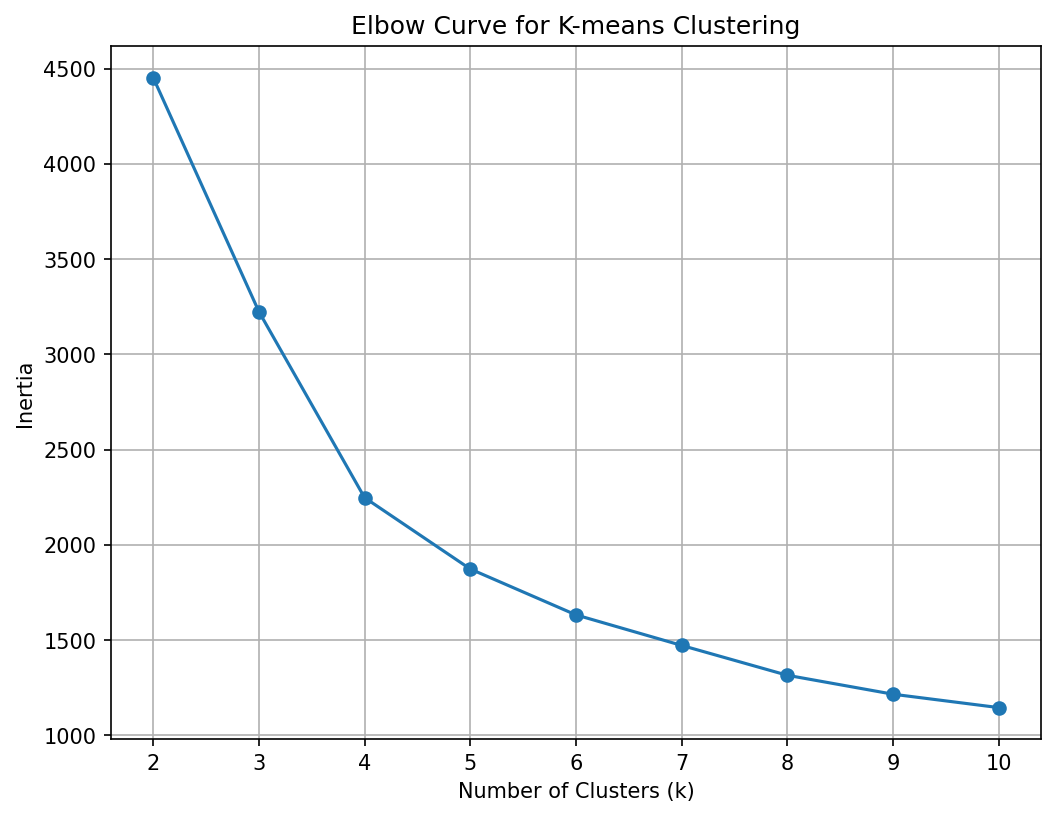

In [108]:
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [119]:
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)


,Recency,Total_Spent,Frequency,Cluster
0,58,1617,29,2
1,38,27,9,3
2,26,776,24,0
3,26,53,12,3
4,94,422,19,2
...,...,...,...,...
2235,46,1341,21,0
2236,56,444,22,2
2237,91,1241,24,2
2238,8,843,24,0


-  The average R, F, and M scores for each cluster gives an idea of the characteristics of the clusters

In [113]:
# Group by cluster and calculate mean values
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [114]:
print(cluster_summary)


   Cluster   R_Score   F_Score   M_Score
0        0  1.474606  3.346760  3.295972
1        1  3.519685  1.478346  1.057087
2        2  3.451670  3.319859  3.342707
3        3  1.493716  1.459605  1.061041


Visualising the Clusters and their respective average values

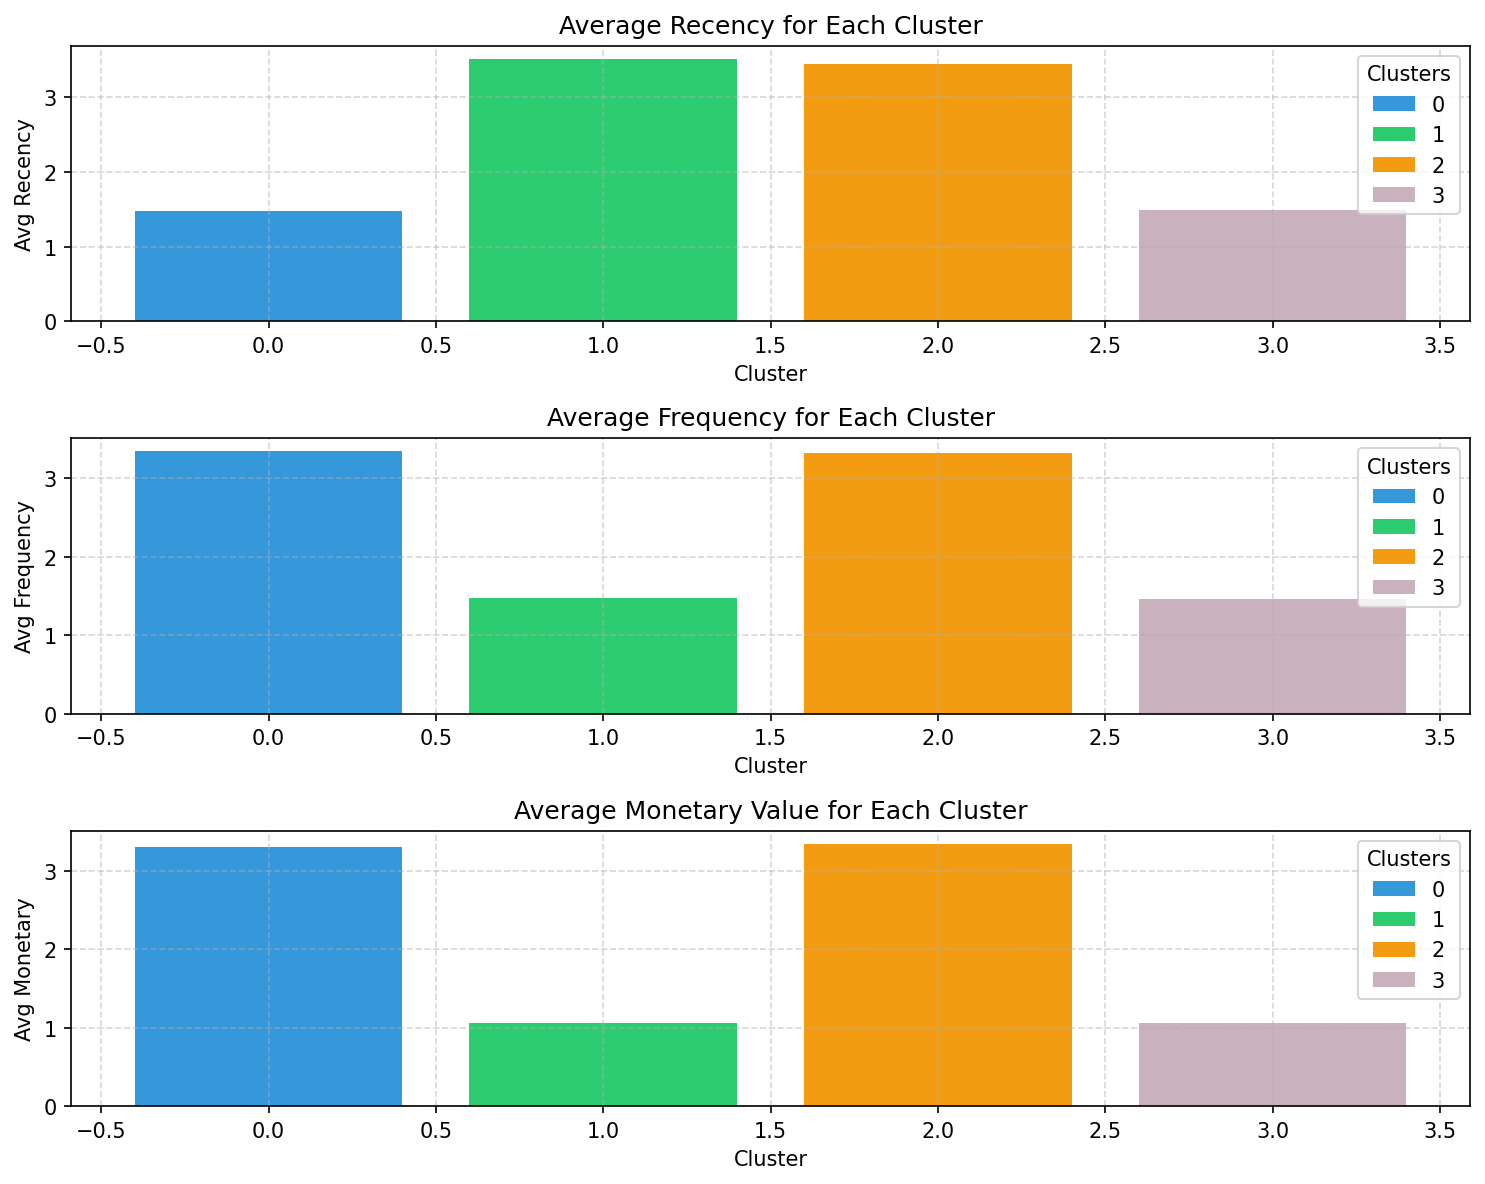

In [115]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

In [116]:
rfm_df.groupby("Cluster").mean().style.highlight_max(color="lightgreen")

,Recency,Total_Spent,Frequency
Cluster,,,
0,23.989492,1056.947461,23.189142
1,75.251969,110.919291,12.440945
2,73.977153,1087.541301,22.913884
3,25.217235,106.583483,12.360862


In [117]:
rfm_df.groupby("Cluster").mean().style.highlight_min(color="red")

,Recency,Total_Spent,Frequency
Cluster,,,
0,23.989492,1056.947461,23.189142
1,75.251969,110.919291,12.440945
2,73.977153,1087.541301,22.913884
3,25.217235,106.583483,12.360862


-Cluster 0: This cluster is characterized by moderate recency. These customers still spend so much more and purchase more frequently than clusters 2 and 3. Let’s call them loyal customers.

-Cluster 1: This cluster is characterized by high recency and relatively moderate frequency and low monetary values. So these are recent customers who can potentially become long-term customers.

-Cluster 2: Of all the four clusters, this cluster has the highest recency, frequency, and monetary values. Let’s call the customers in this cluster champions (or power shoppers).

-Cluster 3: Customers in this cluster tend to spend less. They don’t buy often, and haven’t made a purchase recently either. These are likely inactive or at-risk customers.




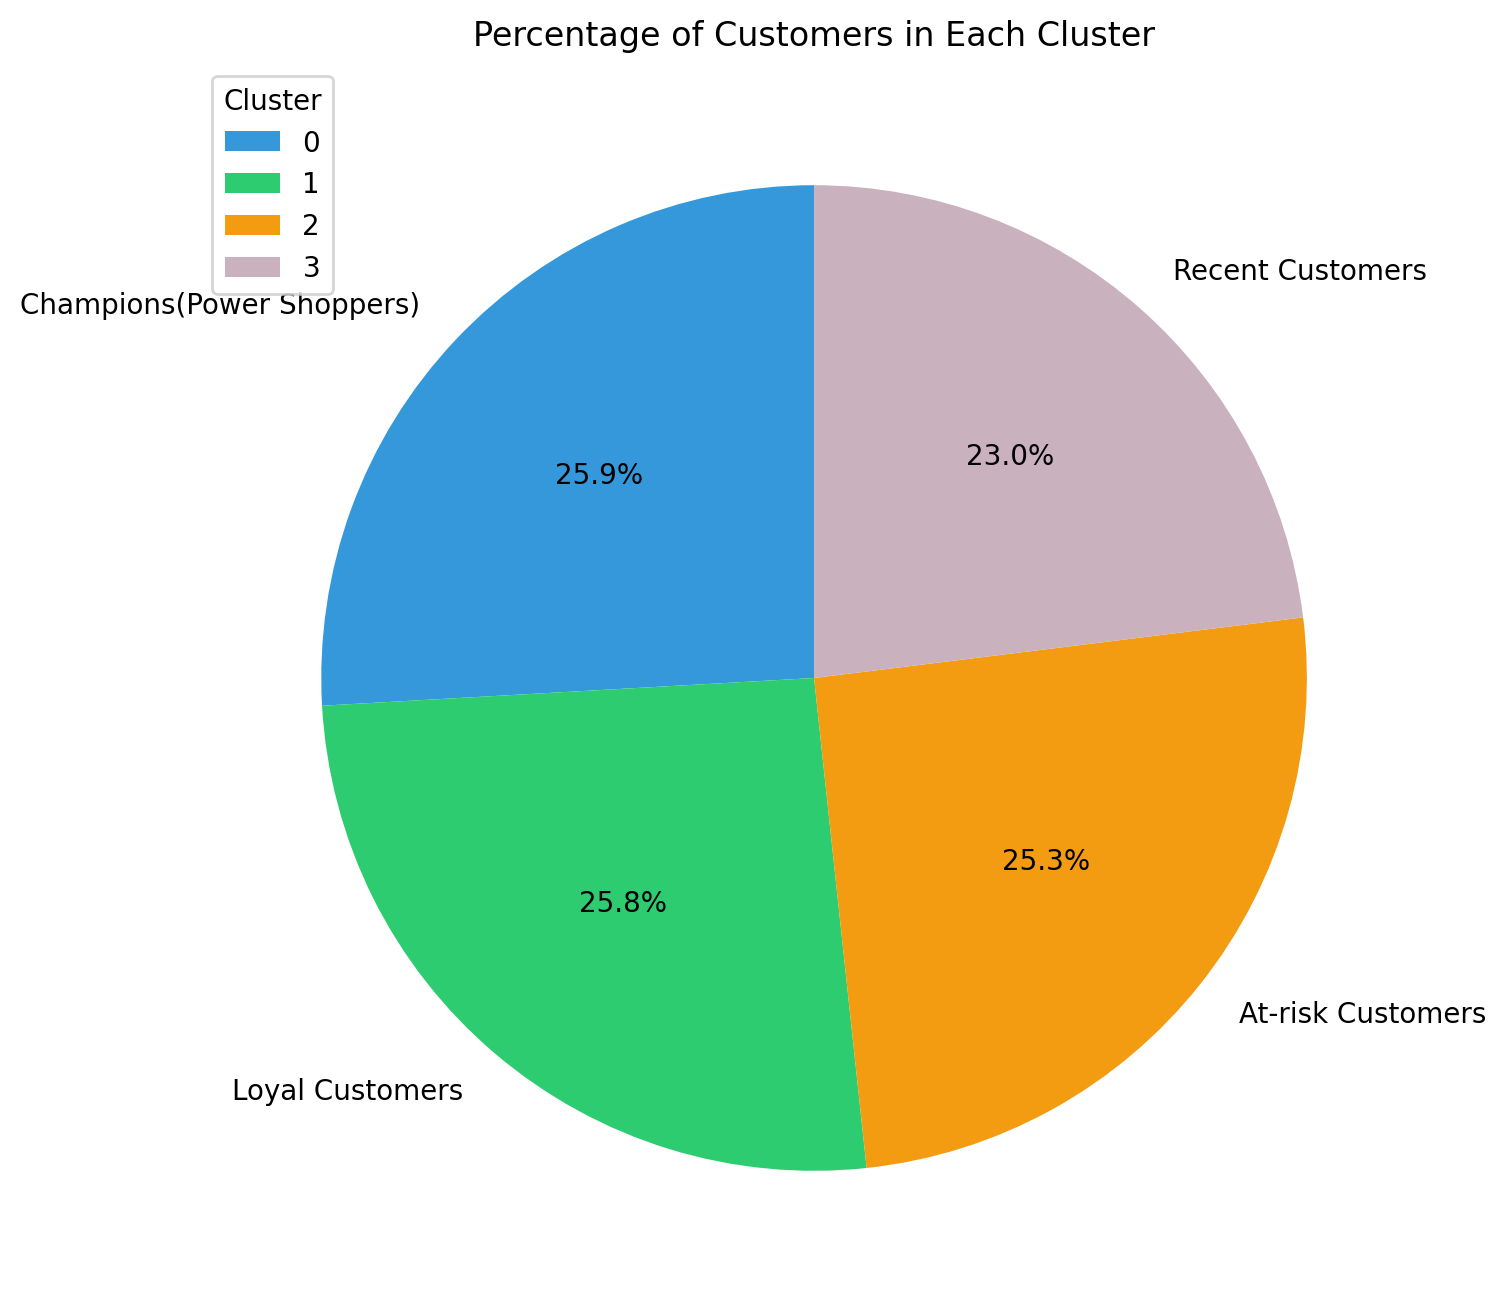

In [79]:
cluster_counts = rfm_df['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()